# H2O AutoML

H2O is a widely-used open-source software for building advanced machine learning models, and one of its most powerful tools is the H2O AutoML platform. With H2O AutoML, building a highly accurate predictive model has never been easier. The platform offers an automated approach to model selection, tuning, and deployment, making it ideal for data scientists and analysts looking to save time and streamline their workflows. By automating the most time-consuming tasks involved in building predictive models, such as feature engineering and hyperparameter tuning, H2O AutoML allows users to focus on the most important aspects of their data analysis. With its intuitive interface and advanced algorithms, H2O AutoML is the go-to platform for anyone looking to build highly accurate and reliable machine learning models.

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=d239cf75e86e1c2f56bb99c0dda4a43b5357e789034ea634b307b071ceefbad4
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo_2d4_e6
  JVM stdout: /tmp/tmpo_2d4_e6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo_2d4_e6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_2tm7tq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import pandas as pd

# Read the data
df_train = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project 2/airplane_train_processed_date.csv', 
                   true_values = ['yes'], false_values = ['no'])

# Select target
y = df_train.satisfaction

# Select predictors
x = df_train.drop(['satisfaction'], axis=1)

In [ ]:
h2o_frame = h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_num = [0 if y[i] == "neutral or dissatisfied" else 1 for i in range(len(y))]
y_num_h2o = h2o.H2OFrame(pd.DataFrame({'y_num': y_num}))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,28 mins 06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_2tm7tq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Read the data
df_test = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project 2/airplane_test_processed_date.csv', 
                   true_values = ['yes'], false_values = ['no'])

# Select target
y_test = df_test.satisfaction

# Select predictors
x_test = df_test.drop(['satisfaction'], axis=1)

In [ ]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [ ]:
import h2o
from h2o.frame import H2OFrame
# Convert pandas DataFrame to H2O DataFrame
h2o_frame = H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x = h2o_frame.columns
y = 'satisfaction'
x.remove(y)

In [ ]:
y_test_num = [0 if val == "neutral or dissatisfied" else 1 for val in y_test]

In [ ]:
# Convert y_test to H2OFrame
y_test = pd.DataFrame(y_test_num, columns=['satisfaction'])
h2o_y_test = H2OFrame(y_test)
h2o_y_test_single = h2o_y_test["satisfaction"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),6/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),1/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


In [ ]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,auc,logloss,aucpr,mean_per_class_error,rmse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230420_221621,0.0286264,0.993462,0.0954723,0.992844,0.0414542,0.169193,7110,0.221717,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230420_221621,0.028947,0.993236,0.0972888,0.992635,0.0420474,0.170138,4704,0.062484,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230420_221621,0.028947,0.993236,0.0972888,0.992635,0.0420474,0.170138,7198,0.056982,StackedEnsemble
GBM_4_AutoML_1_20230420_221621,0.0291223,0.993077,0.0988975,0.992453,0.0421403,0.170653,27489,0.04601,GBM
GBM_2_AutoML_1_20230420_221621,0.0292374,0.993157,0.0986561,0.992519,0.0434475,0.170989,31509,0.034317,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230420_221621,0.0292544,0.993224,0.0973406,0.99258,0.0424241,0.171039,5743,0.049279,StackedEnsemble
GBM_3_AutoML_1_20230420_221621,0.0292941,0.993082,0.0995702,0.992424,0.0416808,0.171155,30895,0.035992,GBM
GBM_1_AutoML_1_20230420_221621,0.0293675,0.993188,0.0978688,0.992539,0.042892,0.171369,51050,0.040285,GBM
XGBoost_2_AutoML_1_20230420_221621,0.0309913,0.992301,0.104602,0.991646,0.0427881,0.176043,33821,0.009854,XGBoost
XGBoost_1_AutoML_1_20230420_221621,0.0314065,0.992067,0.105926,0.991401,0.045368,0.177219,24106,0.01236,XGBoost


In [ ]:
from h2o.model.regression import h2o_mean_squared_error

h2o_frame_test = h2o.H2OFrame(x_test)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(df_test[['satisfaction']])

h2o_mean_squared_error(y_actual, y_pred['predict'])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.0

In [ ]:
h2o_compare = pd.DataFrame(data={'actual': df_test['satisfaction'], 'predicted': y_pred['predict'].as_data_frame().to_numpy().ravel()})

In [ ]:
for col in h2o_compare.columns:
  h2o_compare[col] = [0 if val== "neutral or dissatisfied" else 1 for val in h2o_compare[col]]

In [ ]:
h2o_compare["Date"] = df_test["Date"]

In [ ]:
error = h2o_compare['actual'] - h2o_compare['predicted']

In [ ]:
a = error.value_counts()[0]
b = error.value_counts()[1]
c = error.value_counts()[-1]

In [ ]:
# sample data as a list of dictionaries
data = [{'Negative error': round(c/len(error),3) , 'Positive error': round(b/len(error),3), 'No error': round(a/len(error),3)}]

In [ ]:
# ANSI escape code for bold text
BOLD = '\033[1m'

# ANSI escape code to reset text style
RESET = '\033[0m'

# print bold text
print(BOLD + "ERROR SUMMARY (IN %)" + RESET)

print(data)

ERROR SUMMARY (IN %)
[{'Negative error': 0.012, 'Positive error': 0.027, 'No error': 0.961}]


**Creating a sampled dataset for visualization purpose**

In [ ]:
sampled_rows = h2o_compare.sample(n=50)
sampled_rows = sampled_rows.sort_values(by='Date', ascending=True)

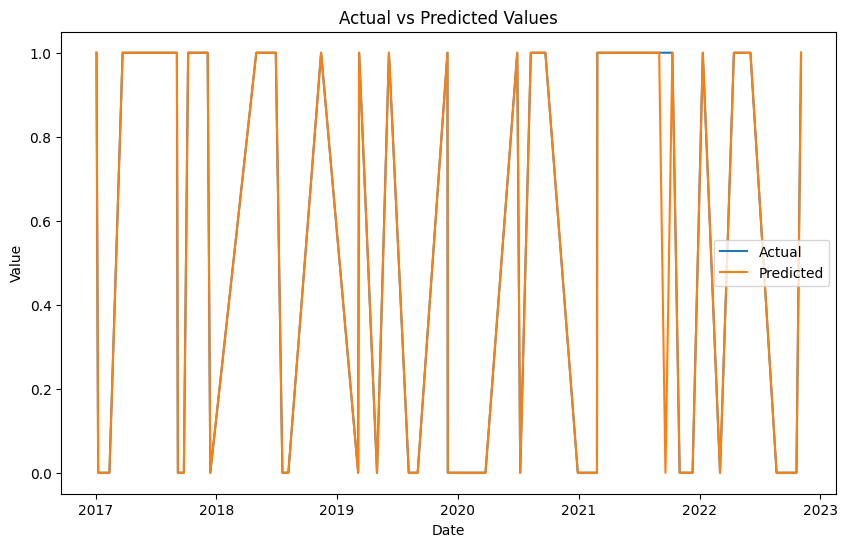

In [ ]:
import matplotlib.pyplot as plt

# Example data
dates = sampled_rows["Date"]
actual_values = sampled_rows['actual']
predicted_values = sampled_rows['predicted']

# Convert dates to datetime objects
dates = pd.to_datetime(dates)

plt.figure(figsize=(10, 6))

# Create a line graph
plt.plot(dates, actual_values, label='Actual')
plt.plot(dates, predicted_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sampled Actual vs Predicted Values')
plt.legend()
plt.show()
